<a href="https://colab.research.google.com/github/deokwoo-han/abc/blob/master/10_15_1_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### https://keras.io/ko/applications/
!pip uninstall -y keras
!pip uninstall -y tensorflow

Found existing installation: Keras 2.2.4
Uninstalling Keras-2.2.4:
  Successfully uninstalled Keras-2.2.4
Found existing installation: tensorflow 1.14.0
Uninstalling tensorflow-1.14.0:
  Successfully uninstalled tensorflow-1.14.0


In [ ]:
!pip install -r ./requirements.txt

  Using cached Keras-2.2.4-py2.py3-none-any.whl (312 kB)
  Using cached tensorflow-1.14.0-cp37-cp37m-manylinux1_x86_64.whl (109.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.14.0 which is incompatible.


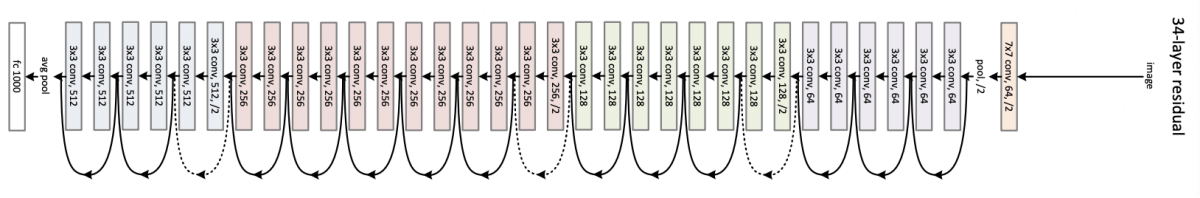

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

Using TensorFlow backend.
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [ ]:
model = ResNet50(weights='imagenet')

In [ ]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [ ]:
img_path = '다운로드.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# 결과를 튜플의 리스트(클래스, 설명, 확률)로 디코딩합니다
# (배치 내 각 샘플 당 하나의 리스트)
print('Predicted:', decode_predictions(preds, top=3)[0])
# 예측결과: [(u'n02504013', u'Indian_elephant', 0.82658225), (u'n01871265', u'tusker', 0.1122357), (u'n02504458', u'African_elephant', 0.061040461)]

Predicted: [('n01443537', 'goldfish', 0.997869), ('n01833805', 'hummingbird', 0.00033857013), ('n01990800', 'isopod', 0.00021692524)]


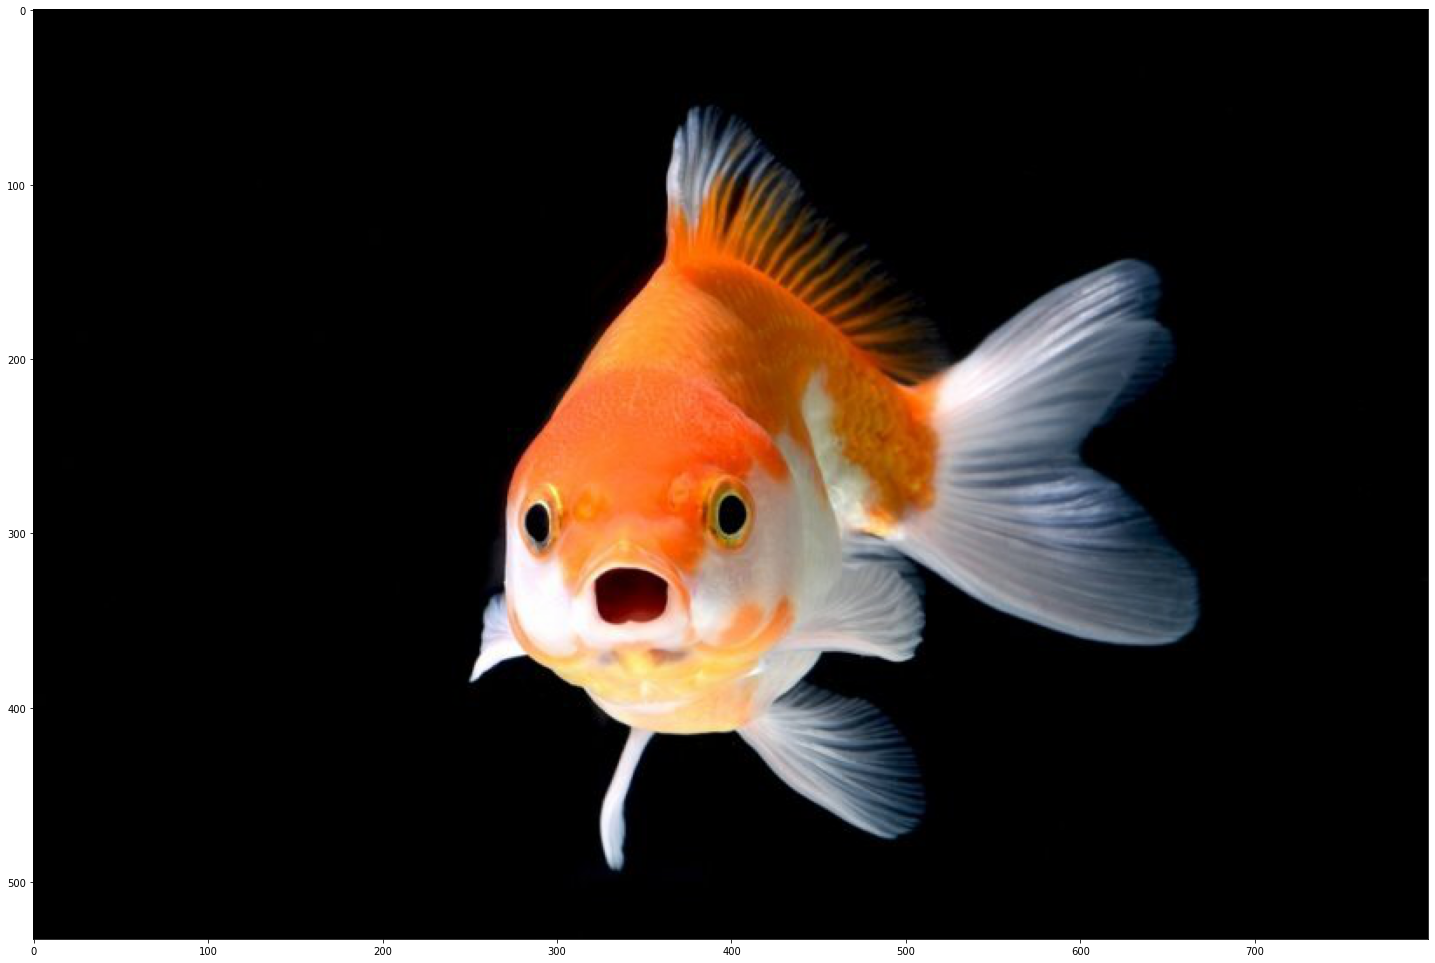

In [ ]:
import os
import sys
import matplotlib.pyplot as plt

from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

image = Image.open(img_path).convert("RGB")

plt.figure(figsize=(25,20))
plt.imshow(image)
plt.show()
plt.close()